<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb) | [Contents](Index.ipynb) | [Customizing Plot Legends](04.06-Customizing-Legends.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.05-Histograms-and-Binnings.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# 直方圖、分箱法及密度

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

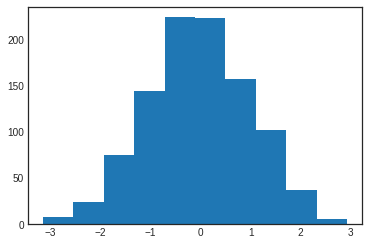

In [2]:
plt.hist(data);

``hist()``函式有許多選項可以用來同時微調計算和顯示:底下是更加客製化的直方圖例子:

(array([ 1.,  1.,  6.,  7., 11.,  6., 18., 22., 35., 44., 43., 57., 67.,
        76., 81., 84., 73., 66., 72., 43., 42., 41., 33., 28., 14., 11.,
        12.,  4.,  1.,  1.]),
 array([-3.15476949, -2.95198327, -2.74919705, -2.54641083, -2.34362461,
        -2.14083839, -1.93805217, -1.73526595, -1.53247972, -1.3296935 ,
        -1.12690728, -0.92412106, -0.72133484, -0.51854862, -0.3157624 ,
        -0.11297618,  0.08981004,  0.29259626,  0.49538248,  0.6981687 ,
         0.90095493,  1.10374115,  1.30652737,  1.50931359,  1.71209981,
         1.91488603,  2.11767225,  2.32045847,  2.52324469,  2.72603091,
         2.92881713]),
 <a list of 1 Patch objects>)

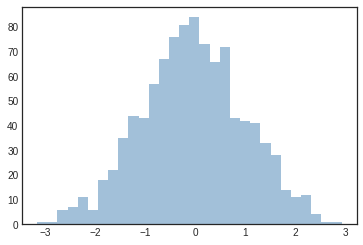

In [9]:
# color：顏色序列。histtype:直方圖類型。edgecolor:直方圖邊框顏色
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')

``plt.hist``說明字串有更多可用的客製化選項資訊。

In [16]:
kwargs

{'alpha': 0.3, 'bins': 40, 'histtype': 'stepfilled'}

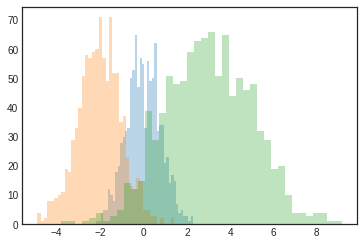

In [18]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40) # histype + alpha會很有用

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [19]:
# 若只想純計算數值，也可用np.histogram
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 32 219 447 259  43]


## 二維直方圖和裝箱法

可建立一個直方圖把二維資料的點讓它們分到二維的箱子中。


In [20]:
# 定義資料:從多變量高斯分布(multivariate Gaussian distribution)
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: 二維直方圖

一個直覺的方式是使用Matplotlib的``plt.hist2d``函式來繪製二維直方圖:

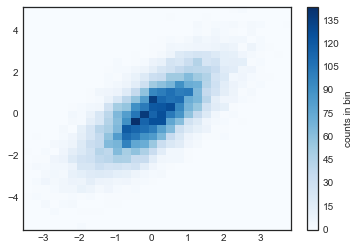

In [ ]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

### ``plt.hexbin``: 六角形的裝箱

二維直方圖建立了一個橫跨在軸上的棋盤型方格。另外一個是棋盤狀的正六角形。

為了有這個效果，Matplotlib提供``plt.hexbin``，可以表現一個二維資料集在一個六角形的網格中進行裝箱後的樣子:

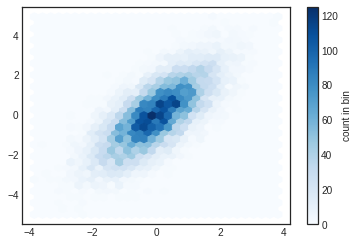

In [22]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### 核密度估計(Kernel density estimation, KDE)

KDE可以當作是一個用來"抹掉"在空間中的點，然後加上結果以取得一個平滑函數。一個快速而簡單的KDE實作可以在``scipy.stats``套件中找到。

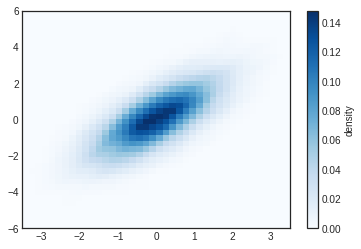

In [25]:
from scipy.stats import gaussian_kde

# 放入一個陣列的大小[Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 在一個方形的格子上進行估算
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()])) # ravel():將多維度數據轉換成一組數據，不會產生數據的副本

# 把結果畫成一個影像
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

KDE有一個平滑長度可以影響介於細節和平滑度之間的把手(knob)(其中一個例子就是無所不在的偏差和變異之取捨)。如何選取一個正確的平滑長度之相關文獻非常多:``gaussian_kde``使用的拇指規則嘗試為輸入資料尋找接近最佳的平滑長度。 

<!--NAVIGATION-->
< [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb) | [Contents](Index.ipynb) | [Customizing Plot Legends](04.06-Customizing-Legends.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.05-Histograms-and-Binnings.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
